In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [35]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [36]:
data=pd.read_csv("/content/adult.csv")

In [37]:
data.shape

(48842, 15)

In [38]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [39]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [40]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000,48842.000,48842.000,48842.000,48842.000,48842.000
mean,38.644,189664.135,10.078,1079.068,87.502,40.422
std,13.711,105604.025,2.571,7452.019,403.005,12.391
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117550.500,9.000,0.000,0.000,40.000
50%,37.000,178144.500,10.000,0.000,0.000,40.000
75%,48.000,237642.000,12.000,0.000,0.000,45.000
max,90.000,1490400.000,16.000,99999.000,4356.000,99.000


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


###Univariate Analysis
#####Analysing age

In [42]:
data['age'].describe()

count   48842.000
mean       38.644
std        13.711
min        17.000
25%        28.000
50%        37.000
75%        48.000
max        90.000
Name: age, dtype: float64

In [43]:
#Printing unique values and it's shape

print(data['age'].unique())
print('*'*75)
print(data['age'].unique().shape)
print('*'*75)
print(data['age'].value_counts())

[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
***************************************************************************
(74,)
***************************************************************************
36    1348
35    1337
33    1335
23    1329
31    1325
34    1303
37    1280
28    1280
30    1278
38    1264
32    1253
41    1235
27    1232
29    1223
39    1206
24    1206
25    1195
40    1187
22    1178
42    1165
26    1153
20    1113
43    1104
46    1097
21    1096
45    1096
47    1081
44    1067
19    1053
51     877
50     866
18     862
49     847
48     845
52     738
53     711
55     621
54     613
17     595
56     564
58     555
57     551
59     523
61     450
60     449
62     394
64     340
63     335
65     284
67     238
66     237
68     178
69     149
70     133
72     120
71     118

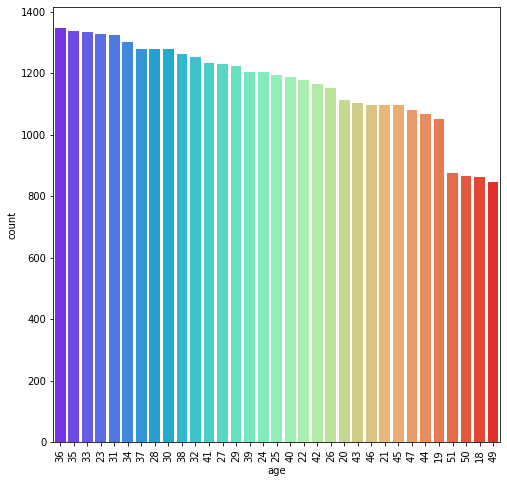

In [44]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['age'],order=data['age'].value_counts().iloc[:33].index,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [45]:
#To find outliers in the data

def iqr(data):
    outliers=[]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    print("Lower limit is: ",Lower_tail)
    print("Upper limit is: ",Upper_tail)
    for i in data:
        if i > Upper_tail or i < Lower_tail:
            outliers.append(i)
    return outliers

<Figure size 576x576 with 0 Axes>

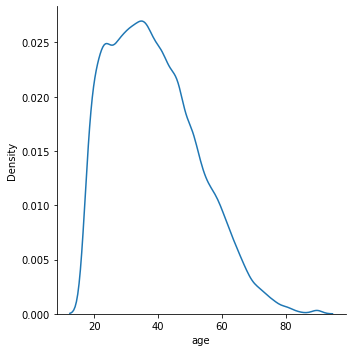

In [46]:
#Plotting the displot to see that the data is normally distributed or not

plt.figure(figsize=(8,8))
sns.displot(x=data['age'],kind='kde',palette='rainbow')

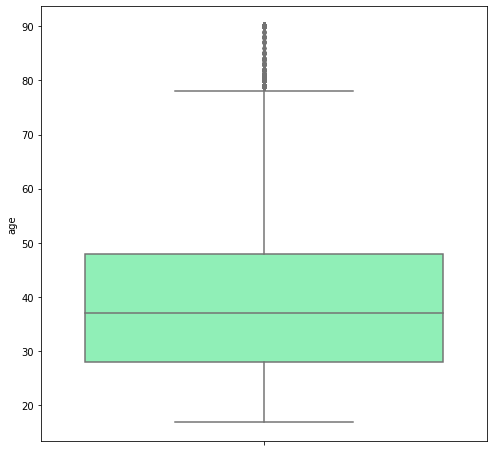

In [47]:
#plotting box plot to find outliers

plt.figure(figsize=(8,8))
sns.boxplot(y=data['age'],palette='rainbow')

In [48]:
# Finding outliers in the data

age_outliers=iqr(data['age'])
print(len(age_outliers))
print(age_outliers)
print(min(age_outliers))

Lower limit is:  -2.0
Upper limit is:  78.0
216
[79, 80, 90, 79, 80, 81, 82, 83, 81, 85, 80, 90, 81, 84, 81, 89, 81, 83, 81, 82, 80, 90, 81, 83, 80, 90, 90, 84, 80, 80, 80, 81, 90, 85, 90, 81, 81, 80, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 90, 79, 79, 81, 81, 90, 82, 90, 87, 81, 88, 80, 81, 80, 81, 90, 88, 89, 84, 80, 80, 83, 79, 81, 79, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 79, 81, 80, 83, 90, 90, 79, 81, 90, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 81, 79, 85, 82, 79, 80, 90, 90, 90, 84, 80, 90, 90, 79, 84, 90, 79, 90, 90, 90, 82, 81, 90, 84, 79, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 79, 81, 80, 79, 80, 79, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 81, 79, 80, 79, 81, 82, 88, 90, 82, 88, 84, 83, 79, 86, 90, 90, 82, 83, 81, 79, 90, 80, 81, 79, 84, 84, 79, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81]
79


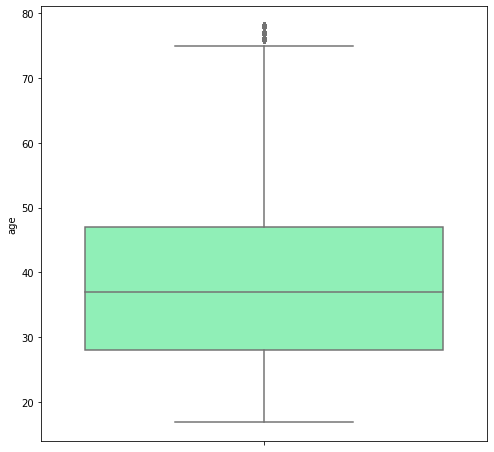

In [49]:
# Removing outliers

data['age']=data[data['age']<79]

#Plotting box plot to see outliers

plt.figure(figsize=(8,8))
sns.boxplot(y=data['age'],palette='rainbow')

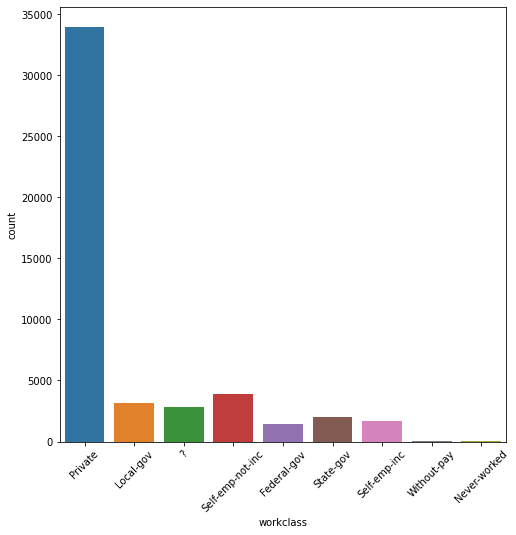

In [50]:
#Plotting countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['workclass'])
plt.xticks(rotation=45)
plt.show()

We can see most people are involved in the private sector i.e. 33906.
The are also missing value in the data '?'.

In [51]:
data['workclass']=data['workclass'].replace('?',np.nan)

data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Rather than having so-much unique values we can incoperate them under two or three unique values.



In [52]:
data['workclass'].replace(['Private','Self-emp-not-inc','Local-gov',np.nan,'State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked'],
                          ['Private','inc','gov',np.nan,'gov','inc','gov','Without-pay','Never-worked'],inplace=True)

data['workclass'].value_counts()

Private         33906
gov              6549
inc              5557
Without-pay        21
Never-worked       10
Name: workclass, dtype: int64

In [53]:
data['workclass'].isnull().sum()


2799

In [55]:
mode=data['workclass'].mode()[0]

In [56]:
#Filling missing value with mode

data['workclass'].replace(np.nan,'Private',inplace=True)

data['workclass'].isnull().sum()

0

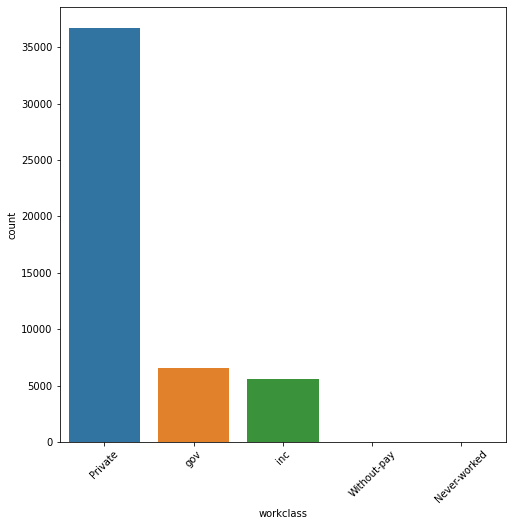

In [57]:
#Plotting countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['workclass'])
plt.xticks(rotation=45)
plt.show()

Now there are no missing values in the data.



###Analysing education


In [58]:
data['education'].describe()

count       48842
unique         16
top       HS-grad
freq        15784
Name: education, dtype: object

In [59]:
data['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

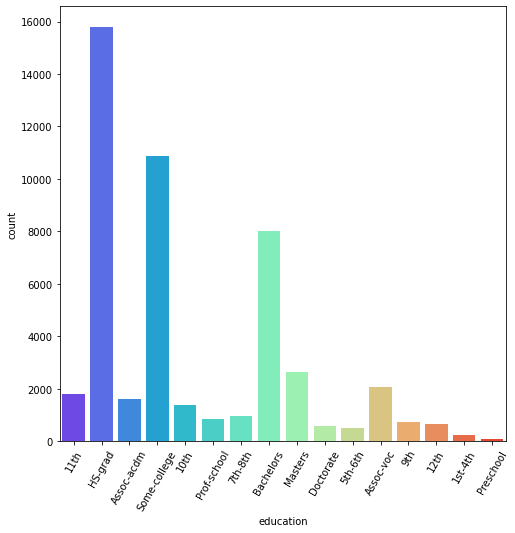

In [60]:
# Plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['education'],palette='rainbow')
plt.xticks(rotation=60)
plt.show()

Most of the people have completed HS-grad and some bacholers.

On the other there are also peope working who have just completed their pre-school, 1st-8th and they have not completed any higher education, which is a matter of concern.

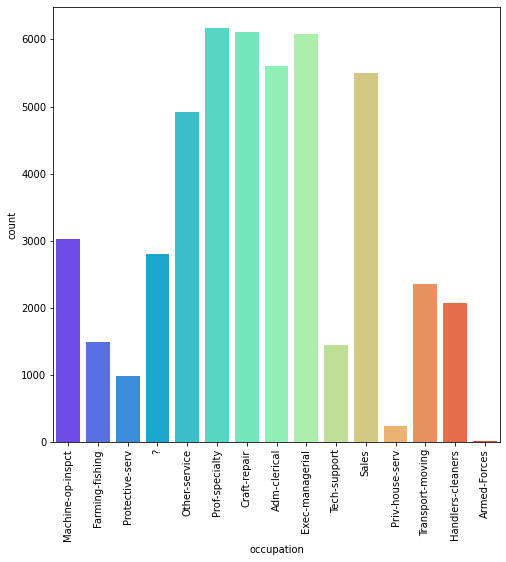

In [61]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['occupation'],palette='rainbow')
plt.xticks(rotation=90)
plt.show()

<Figure size 576x576 with 0 Axes>

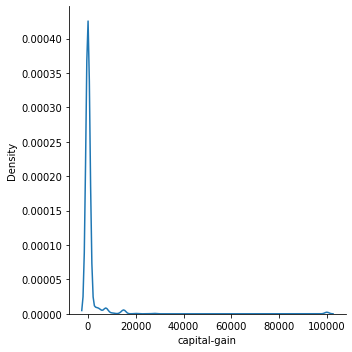

In [62]:
plt.figure(figsize=(8,8))
sns.displot(x=data['capital-gain'],kind='kde')

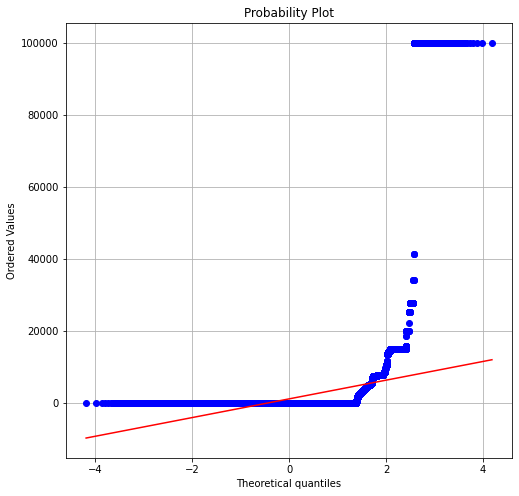

In [63]:
plt.figure(figsize=(8,8))
stats.probplot(x=data['capital-gain'],dist='norm',plot=plt)
plt.grid()

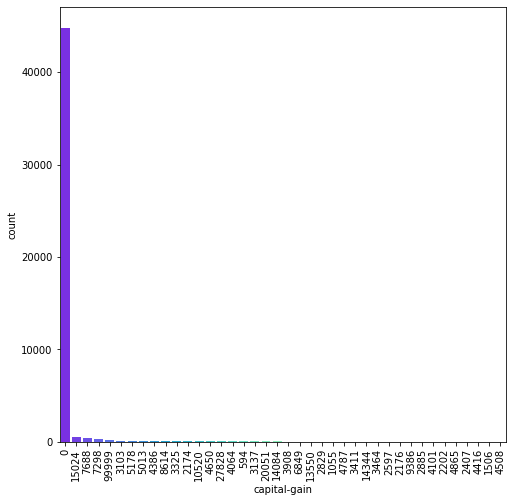

In [64]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['capital-gain'],order=data['capital-gain'].value_counts().iloc[:40].index,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

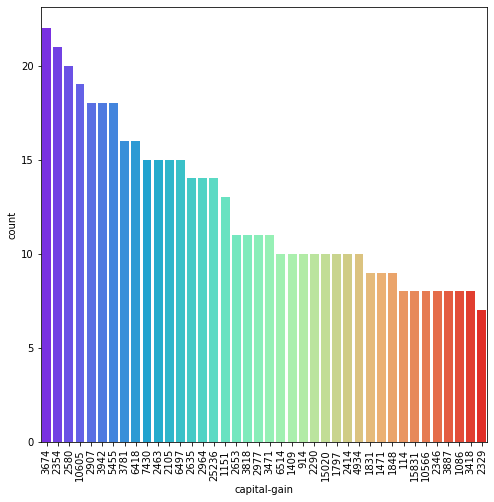

In [65]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['capital-gain'],order=data['capital-gain'].value_counts().iloc[40:80].index,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

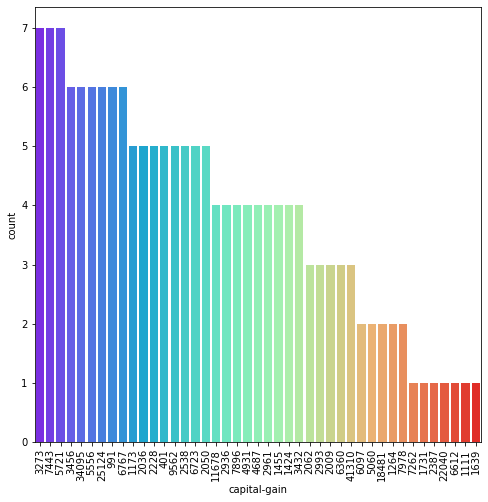

In [66]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['capital-gain'],order=data['capital-gain'].value_counts().iloc[80:].index,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

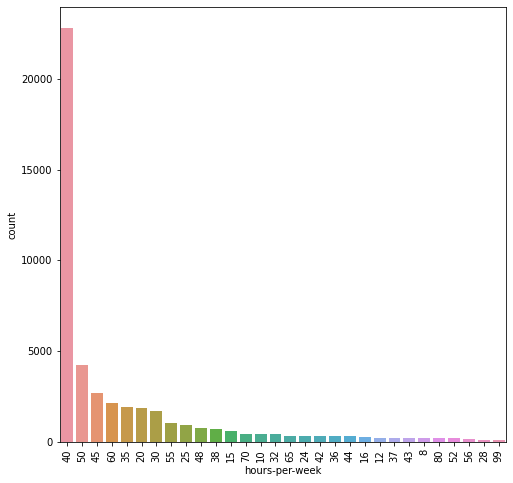

In [67]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['hours-per-week'],order=data['hours-per-week'].value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.show()

<Figure size 576x576 with 0 Axes>

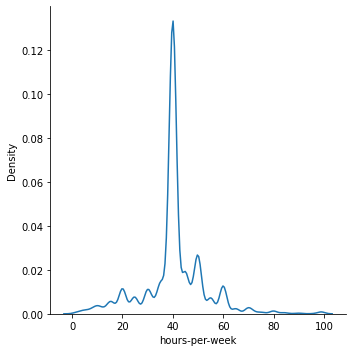

In [68]:
plt.figure(figsize=(8,8))
sns.displot(x=data['hours-per-week'],kind='kde')


The data is preety much symmetric.

There are some outliers present in the data

In [69]:
print("The skewness of the data is: ",data['hours-per-week'].skew())
print("The kurtosis of the data is: ",data['hours-per-week'].kurt())

The skewness of the data is:  0.23874965720275756
The kurtosis of the data is:  2.9510590898442954


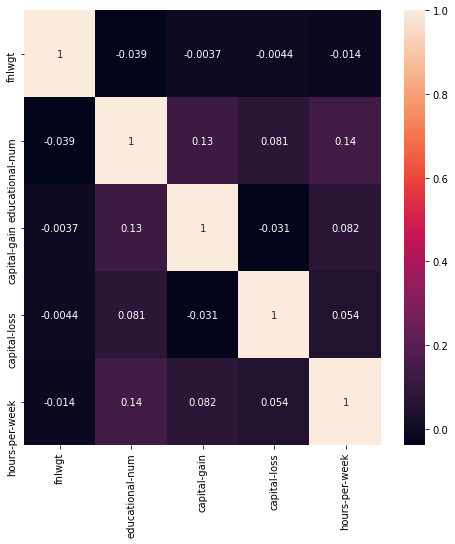

In [70]:
# Plotting heatmap to find correlation

plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)

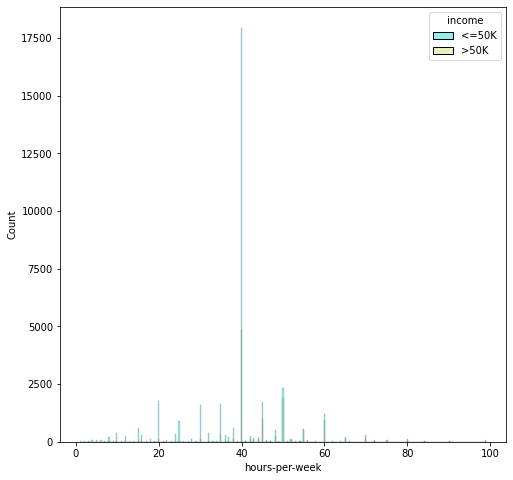

In [71]:
plt.figure(figsize=(8,8))
sns.histplot(x=data['hours-per-week'],hue=data['income'],palette='rainbow')